In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
from scipy.integrate import solve_ivp

In [34]:
def AirResistance(v,r):#球体のみを考える
    dv = 1.81e-5#Pa*s
    density = 1.2#kg/m^3
    Re = density*abs(v)*2.0*r/dv
    if(Re < 1000):
        return 6*np.pi*dv*r*v
    else:
        return 1.0/2.0*0.47*density*(np.pi*r*r)*v*v

In [35]:
g = 9.80665#m/s^2
m = 0.614#kg
r = 0.25/2.0#m
k = 0.7#反発係数

T = [0,2.5]

def fx(t,x):
    return [x[1],0-AirResistance(x[1],r)/m]

def fy(t,x):
    return [x[1],-g-AirResistance(x[1],r)/m]

def touchGround(t,x):
    return x[0]

touchGround.terminal = True

Lower Limit
 1432.394487827058 r/m
Tlerance 
 ± 19.098593171027442 r/m


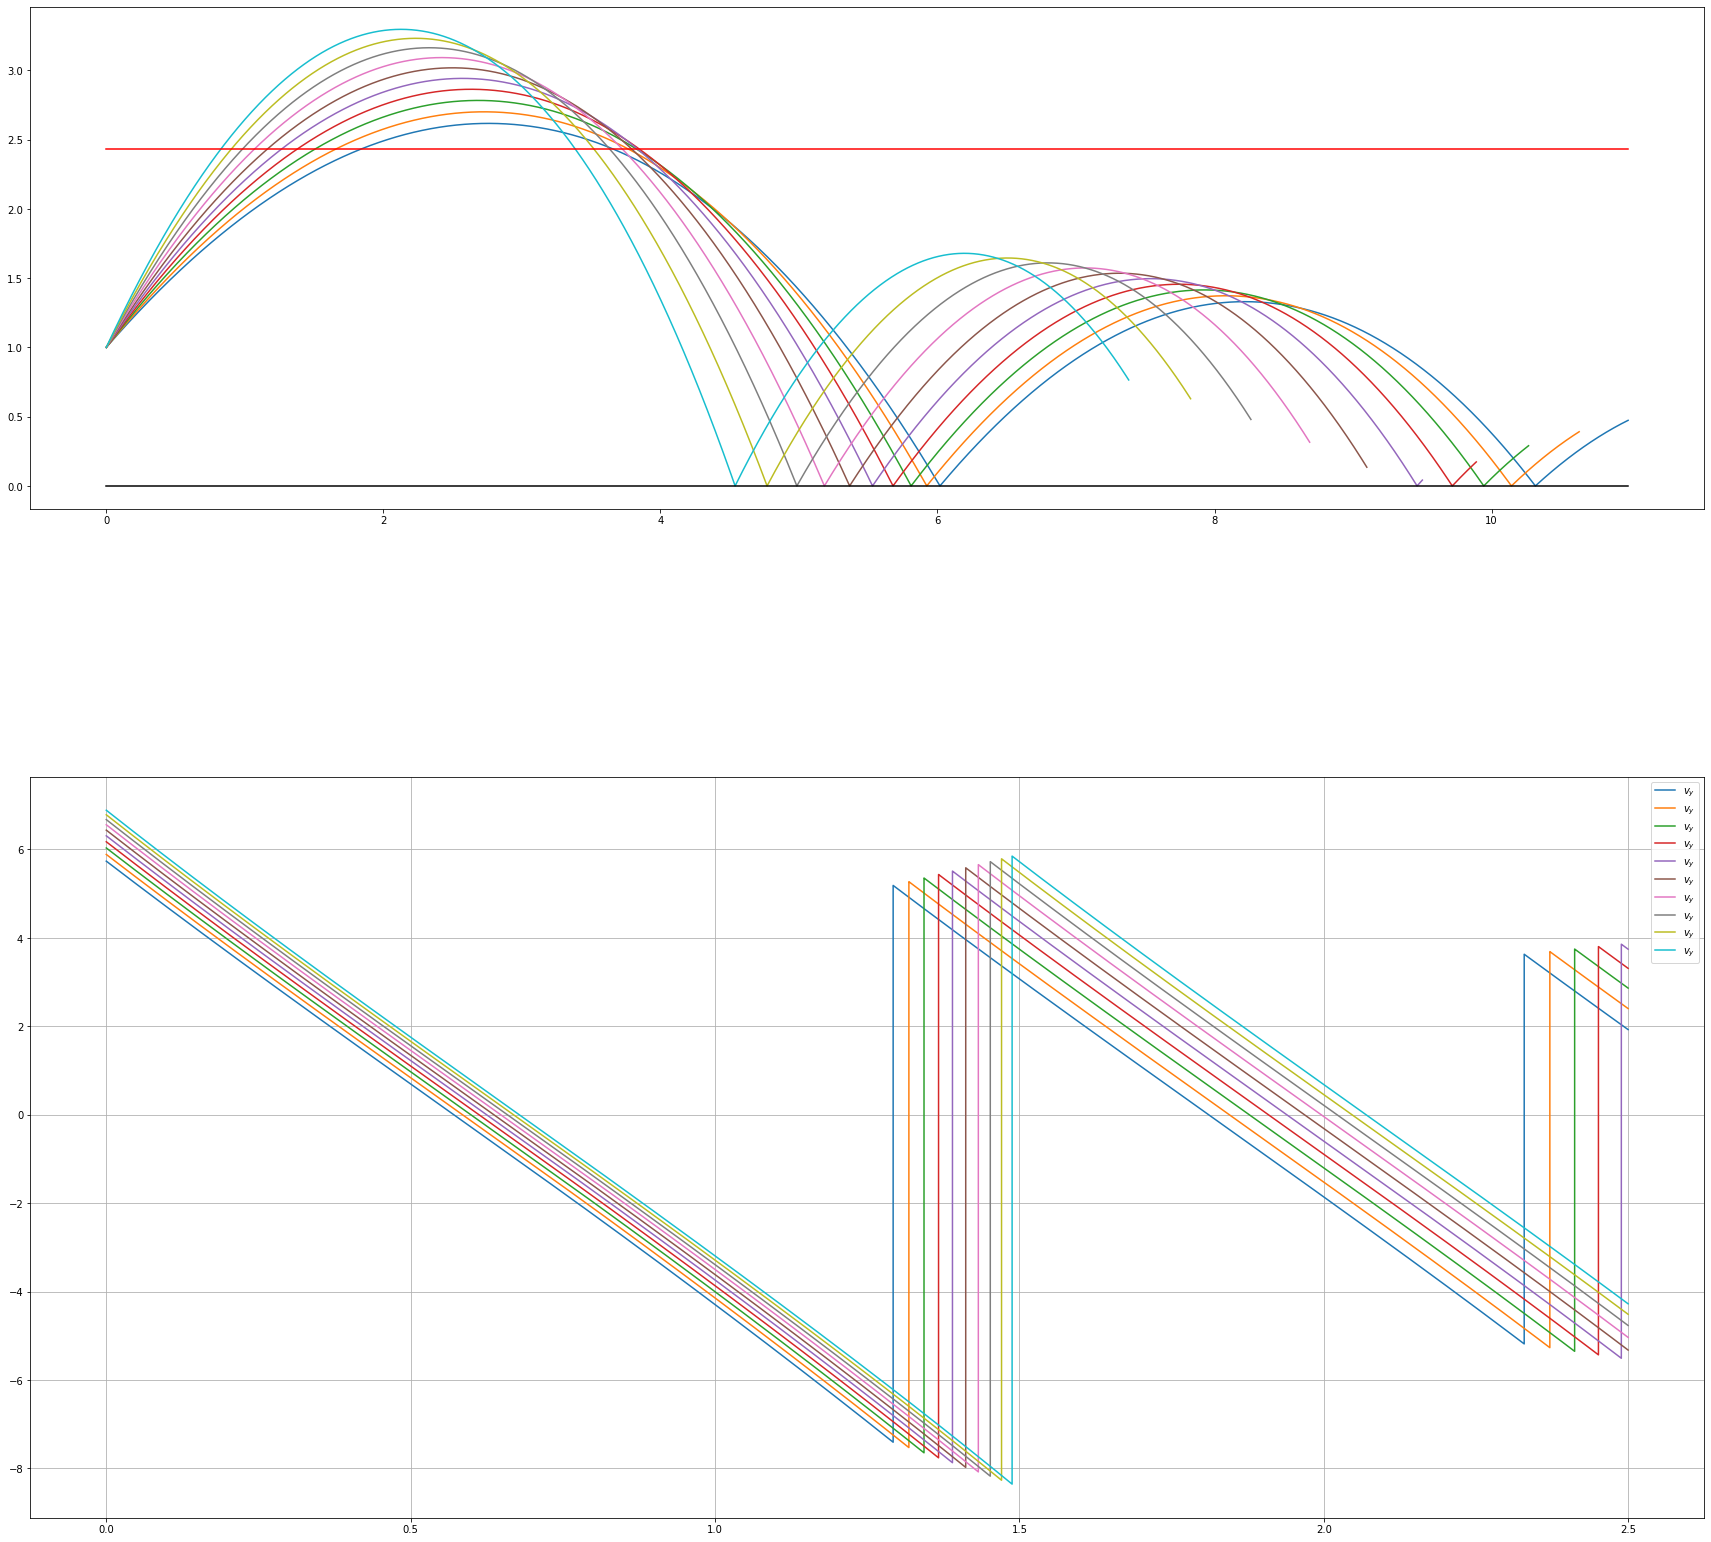

In [36]:
fig,[ax,ax1] = plt.subplots(2,figsize=[30,30])

ax.set(aspect=1)

max_ = 0

t_eval=np.linspace(*T,100000)

def plotOrbit(h,v_0,arg):
    global max_
    x_0 = [0,v_0*np.cos(arg)]
    y_0 = [h,v_0*np.sin(arg)]

    x = solve_ivp(fx,T,x_0,method='RK45',t_eval=t_eval).y

    t_eval_y = t_eval.copy()

    y = [[],[]]
    while 0 < t_eval_y.shape[0]:
        y_ = solve_ivp(fy,T,y_0,method='RK45',t_eval=t_eval_y,events=touchGround)
        t_eval_y = t_eval_y[:-len(y_.t)]
        y_0 = [1e-30,-k*y_.y[1][-1]]
        y[0].extend(y_.y[0])
        y[1].extend(y_.y[1])

    if(max_ < x[0,-1]):
        max_ = x[0,-1]

    y = np.array(y)
    ax.plot(x[0,y[0]>=0],y[0,y[0]>=0],label="$v_0$:{:.2f} $arg$:{:.2f}".format(v_0,180*arg/np.pi))
    ax1.plot(t_eval[y[0]>0],y[1,y[0]>0],label="$v_y$")
    #ax.plot(x[y[:,0]>0,0],y[y[:,0]>0,0],label="$v_0$:{:.2f} $arg$:{:.2f}".format(v_0,180*arg/np.pi))

kind = 10

v_0 = 7.6#2*np.sqrt(2*g)

edge = 0.1
argedge = 8

#args = np.linspace(0,np.pi/2,kind)
args = np.linspace(np.pi*(57-argedge)/180,np.pi*(57+argedge)/180,kind)
v_0s = np.linspace(v_0-edge,v_0+edge,kind)

h = 1

for i in range(kind):
    #plotOrbit(h,v_0s[i],np.pi*57/180)
    plotOrbit(h,v_0,args[i])


goal = 2.43
goalR = 0.45
TreePoint = 3.75

ax.plot([0,max_],[goal,goal],c='r')
ax.plot([0,max_],[0,0],c='k')
# ax.scatter(TreePoint+goalR,goal,c='k')
# ax.scatter(TreePoint-goalR,goal,c='k')
# ax.scatter(TreePoint+goalR-r,goal,c='b')
# ax.scatter(TreePoint-goalR+r,goal,c='b')

wheelSize = 0.1 #直径
gearRate = 1

print("Lower Limit\n {} r/m".format(gearRate*(v_0-edge)/(np.pi*wheelSize)*60))
print("Tlerance \n ± {} r/m".format(gearRate*   edge   /(np.pi*wheelSize)*60))

plt.grid()
plt.legend()
plt.show()